In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to your dataset
data_root = r"C:\Users\Megat\Downloads\DownloadImages\images"

# Define image size
IMAGE_SHAPE = (224, 224)

# Define the training and validation data directories
TRAINING_DATA_DIR = str(data_root)


In [6]:
# Data augmentation and preprocessing for training and validation
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)


Found 6472 images belonging to 78 classes.
Found 1575 images belonging to 78 classes.


In [7]:
# Define class labels
dataset_labels = train_generator.class_indices.keys()

# Load MobileNetV2 model without the top layer
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3)
)

# Add custom classification layers on top of MobileNetV2
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(len(dataset_labels), activation='softmax')(x)

# Create the final model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers during initial training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, verbose=1,
                    validation_data=valid_generator)


Epoch 1/10


C:\Users\Megat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  6/203 ━━━━━━━━━━━━━━━━━━━━ 47s 239ms/step - accuracy: 0.0752 - loss: 5.0553

C:\Users\Megat\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


203/203 ━━━━━━━━━━━━━━━━━━━━ 61s 286ms/step - accuracy: 0.2523 - loss: 3.1671 - val_accuracy: 0.4902 - val_loss: 1.7944
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 280ms/step - accuracy: 0.6223 - loss: 1.2325 - val_accuracy: 0.5517 - val_loss: 1.5480
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 281ms/step - accuracy: 0.7789 - loss: 0.7060 - val_accuracy: 0.5422 - val_loss: 1.6863
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 281ms/step - accuracy: 0.8551 - loss: 0.4772 - val_accuracy: 0.6076 - val_loss: 1.4445
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 279ms/step - accuracy: 0.8940 - loss: 0.3410 - val_accuracy: 0.6298 - val_loss: 1.5788
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 58s 282ms/step - accuracy: 0.9145 - loss: 0.2826 - val_accuracy: 0.6178 - val_loss: 1.6007
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 280ms/step - accuracy: 0.9305 - loss: 0.2552 - val_accuracy: 0.6260 - val_loss: 1.6765
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 278ms/step - accuracy: 0.9360 - loss: 0.2314 - val

In [8]:
# Fine-tune the model by unfreezing some layers
for layer in model.layers[:100]:
    layer.trainable = False
for layer in model.layers[100:]:
    layer.trainable = True

# Compile the model for fine-tuning
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(train_generator, epochs=10, verbose=1,
                              validation_data=valid_generator)


Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 84s 389ms/step - accuracy: 0.6799 - loss: 1.1440 - val_accuracy: 0.6102 - val_loss: 1.9277
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 78s 384ms/step - accuracy: 0.8862 - loss: 0.3648 - val_accuracy: 0.6254 - val_loss: 1.7933
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 78s 382ms/step - accuracy: 0.9311 - loss: 0.2430 - val_accuracy: 0.6368 - val_loss: 1.6337
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 78s 381ms/step - accuracy: 0.9407 - loss: 0.2053 - val_accuracy: 0.6514 - val_loss: 1.5997
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 78s 383ms/step - accuracy: 0.9458 - loss: 0.1736 - val_accuracy: 0.6533 - val_loss: 1.5234
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 79s 385ms/step - accuracy: 0.9563 - loss: 0.1527 - val_accuracy: 0.6610 - val_loss: 1.4725
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 78s 382ms/step - accuracy: 0.9668 - loss: 0.1281 - val_accuracy: 0.6590 - val_loss: 1.4564
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 78s 383ms/step - accuracy: 0.9613 - loss: 0

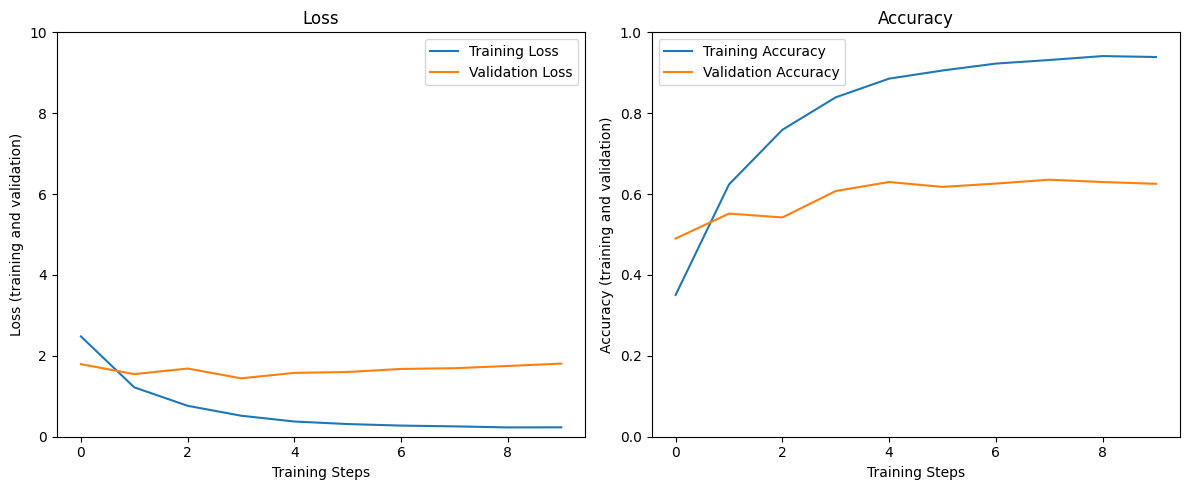

In [41]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
ax1.set_title('Loss')
ax1.set_ylabel('Loss (training and validation)')
ax1.set_xlabel('Training Steps')
ax1.set_ylim([0, 10])
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.legend()

# Plot Accuracy
ax2.set_title('Accuracy')
ax2.set_ylabel('Accuracy (training and validation)')
ax2.set_xlabel('Training Steps')
ax2.set_ylim([0, 1])
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


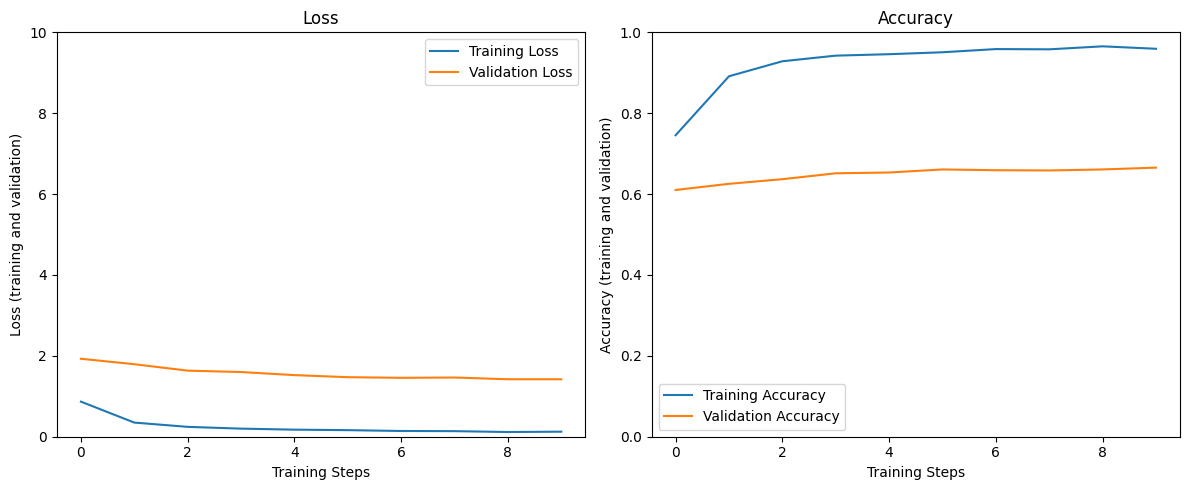

In [40]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
ax1.set_title('Loss')
ax1.set_ylabel('Loss (training and validation)')
ax1.set_xlabel('Training Steps')
ax1.set_ylim([0, 10])
ax1.plot(history_fine_tune.history['loss'], label='Training Loss')
ax1.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
ax1.legend()

# Plot Accuracy
ax2.set_title('Accuracy')
ax2.set_ylabel('Accuracy (training and validation)')
ax2.set_xlabel('Training Steps')
ax2.set_ylim([0, 1])
ax2.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
ax2.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


In [10]:
# Save the model in the recommended Keras format
model.save("fruitmodel.keras")

# Load class labels
with open('labels.txt', 'w') as f:
    f.write('\n'.join(dataset_labels))

In [11]:
# Load your saved Keras model
model = tf.keras.models.load_model("fruitmodel.keras")

# Convert the Keras model to a concrete function
concrete_func = tf.function(lambda x: model(x))
concrete_func = concrete_func.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

# Convert the concrete function to TFLite format
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func], trackable_obj=model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("fruitmodel.tflite", "wb") as f:
    f.write(tflite_model)

C:\Users\Megat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 162 variables whereas the saved optimizer has 60 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [12]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Ripe Apple' 'Ripe Avacado' 'Ripe Banana' 'Ripe Blueberry' 'Ripe Cherry'
 'Ripe Dragonfruit' 'Ripe Durian' 'Ripe Grapes' 'Ripe Guava'
 'Ripe Honeydew' 'Ripe Kiwi' 'Ripe Lemon' 'Ripe Lychee' 'Ripe Mango'
 'Ripe Mangosteen' 'Ripe Orange' 'Ripe Papaya' 'Ripe Passionfruit'
 'Ripe Peach' 'Ripe Pear' 'Ripe Pineapple' 'Ripe Pomegranate'
 'Ripe Rambutan' 'Ripe Raspberry' 'Ripe Strawberry' 'Ripe Watermelon'
 'Rotten Apple' 'Rotten Avacado' 'Rotten Banana' 'Rotten Blueberry'
 'Rotten Cherry' 'Rotten Dragonfruit' 'Rotten Durian' 'Rotten Grapes'
 'Rotten Guava' 'Rotten Honeydew' 'Rotten Kiwi' 'Rotten Lemon'
 'Rotten Lychee' 'Rotten Mango' 'Rotten Mangosteen' 'Rotten Orange'
 'Rotten Papaya' 'Rotten Passionfruit' 'Rotten Peach' 'Rotten Pear'
 'Rotten Pineapple' 'Rotten Pomegranate' 'Rotten Rambutan'
 'Rotten Raspberry' 'Rotten Strawberry' 'Rotten Watermelon' 'Unripe Apple'
 'Unripe Avacado' 'Unripe Banana' 'Unripe Blueberry' 'Unripe Cherry'
 'Unripe Dragonfruit' 'Unripe Durian' 'Unripe Grapes' 'Un

In [13]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [14]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
Prediction results shape: (32, 78)


In [15]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Rotten Watermelon' 'Unripe Mangosteen' 'Ripe Avacado' 'Ripe Apple'
 'Ripe Orange' 'Ripe Peach' 'Unripe Grapes' 'Ripe Grapes' 'Unripe Papaya'
 'Ripe Dragonfruit' 'Rotten Blueberry' 'Rotten Papaya'
 'Unripe Passionfruit' 'Rotten Guava' 'Rotten Durian' 'Rotten Lemon'
 'Unripe Grapes' 'Unripe Peach' 'Ripe Banana' 'Unripe Rambutan'
 'Rotten Kiwi' 'Rotten Lemon' 'Ripe Banana' 'Ripe Blueberry' 'Ripe Peach'
 'Unripe Dragonfruit' 'Ripe Blueberry' 'Rotten Durian' 'Unripe Kiwi'
 'Unripe Passionfruit' 'Ripe Pear' 'Rotten Durian']


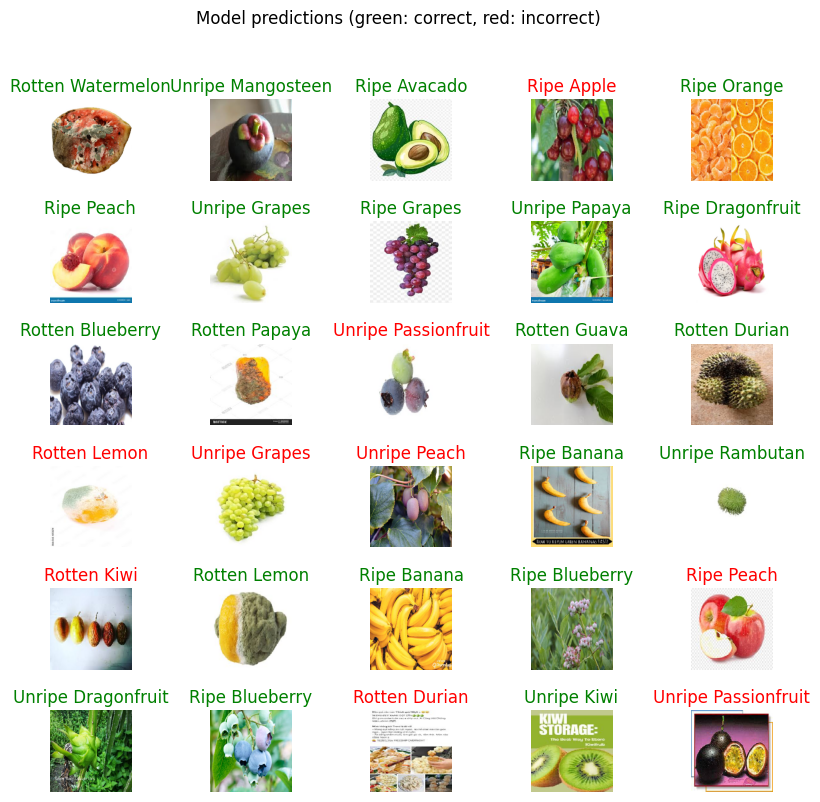

In [16]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image

dataset_labels = [
    'Ripe Apple', 'Ripe Avocado', 'Ripe Banana', 'Ripe Blueberry', 'Ripe Cherry',
    'Ripe Dragonfruit', 'Ripe Durian', 'Ripe Grapes', 'Ripe Guava',
    'Ripe Honeydew', 'Ripe Kiwi', 'Ripe Lemon', 'Ripe Lychee', 'Ripe Mango',
    'Ripe Mangosteen', 'Ripe Orange', 'Ripe Papaya', 'Ripe Passionfruit',
    'Ripe Peach', 'Ripe Pear', 'Ripe Pineapple', 'Ripe Pomegranate',
    'Ripe Rambutan', 'Ripe Raspberry', 'Ripe Strawberry', 'Ripe Watermelon',
    'Rotten Apple', 'Rotten Avocado', 'Rotten Banana', 'Rotten Blueberry',
    'Rotten Cherry', 'Rotten Dragonfruit', 'Rotten Durian', 'Rotten Grapes',
    'Rotten Guava', 'Rotten Honeydew', 'Rotten Kiwi', 'Rotten Lemon',
    'Rotten Lychee', 'Rotten Mango', 'Rotten Mangosteen', 'Rotten Orange',
    'Rotten Papaya', 'Rotten Passionfruit', 'Rotten Peach', 'Rotten Pear',
    'Rotten Pineapple', 'Rotten Pomegranate', 'Rotten Rambutan',
    'Rotten Raspberry', 'Rotten Strawberry', 'Rotten Watermelon', 'Unripe Apple',
    'Unripe Avocado', 'Unripe Banana', 'Unripe Blueberry', 'Unripe Cherry',
    'Unripe Dragonfruit', 'Unripe Durian', 'Unripe Grapes', 'Unripe Guava',
    'Unripe Honeydew', 'Unripe Kiwi', 'Unripe Lemon', 'Unripe Lychee',
    'Unripe Mango', 'Unripe Mangosteen', 'Unripe Orange', 'Unripe Papaya',
    'Unripe Passionfruit', 'Unripe Peach', 'Unripe Pear', 'Unripe Pineapple',
    'Unripe Pomegranate', 'Unripe Rambutan', 'Unripe Raspberry',
    'Unripe Strawberry', 'Unripe Watermelon'
]


img_path = 'C:/Users/Megat/Downloads/testingfruitfyp/d.webp'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = x / 255
x = np.expand_dims(x, axis=0)
result = model.predict(x)

threshold = 0.5  # Adjust this threshold as needed

if np.max(result) < threshold:
    predicted_label = 'Not a Fruit'
else:
    predicted_id = np.argmax(result)
    predicted_label = dataset_labels[predicted_id]

print(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Rotten Strawberry
